In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from utils import reduced_classes_with_other

X_train, X_test, y_train, y_test = reduced_classes_with_other()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
# Create the model
model = xgb.XGBClassifier()

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
num_trees = np.arange(20, 200, 10)

train_accuracy = []
val_accuracy = []
for m in tqdm(num_trees):
    model.set_params(n_estimators=m)
    model = model.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred_encoded = model.predict(X_val)

    # Evaluate the model
    train_accuracy.append(model.score(X_train, y_train_encoded))
    val_accuracy.append(model.score(X_val, y_val_encoded))

100%|██████████| 18/18 [05:36<00:00, 18.68s/it]


/var/folders/9f/0qkxn3mj7zd4n0_7vpzl6jt40000gn/T/ipykernel_49345/3458747637.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(num_trees,  train_accuracy, label='Training', cmap='Blues')
/var/folders/9f/0qkxn3mj7zd4n0_7vpzl6jt40000gn/T/ipykernel_49345/3458747637.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(num_trees,  val_accuracy, label='Validation', cmap='Blues')


Text(0, 0.5, 'accuracy')

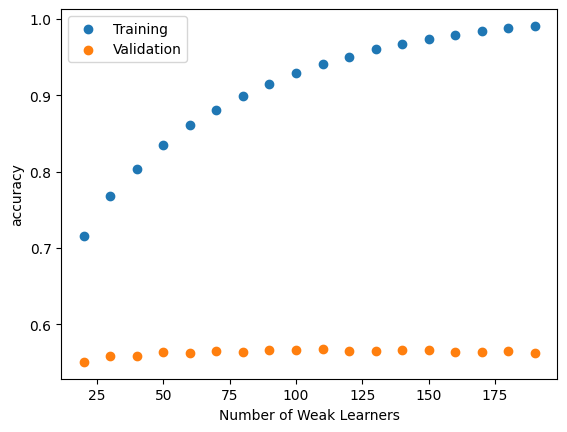

In [ ]:
plt.scatter(num_trees,  train_accuracy, label='Training', cmap='Blues')
plt.scatter(num_trees,  val_accuracy, label='Validation', cmap='Blues')
plt.legend()
plt.xlabel('Number of Weak Learners')
plt.ylabel('accuracy')

In [ ]:
model.score(X_test, y_test_encoded)

0.5319811800610377

In [ ]:
n_relevant_features = model.feature_importances_[model.feature_importances_ >= 0.01].shape[0]

In [ ]:
m = 50
model.set_params(n_estimators=m)
model = model.fit(X_train, y_train_encoded)


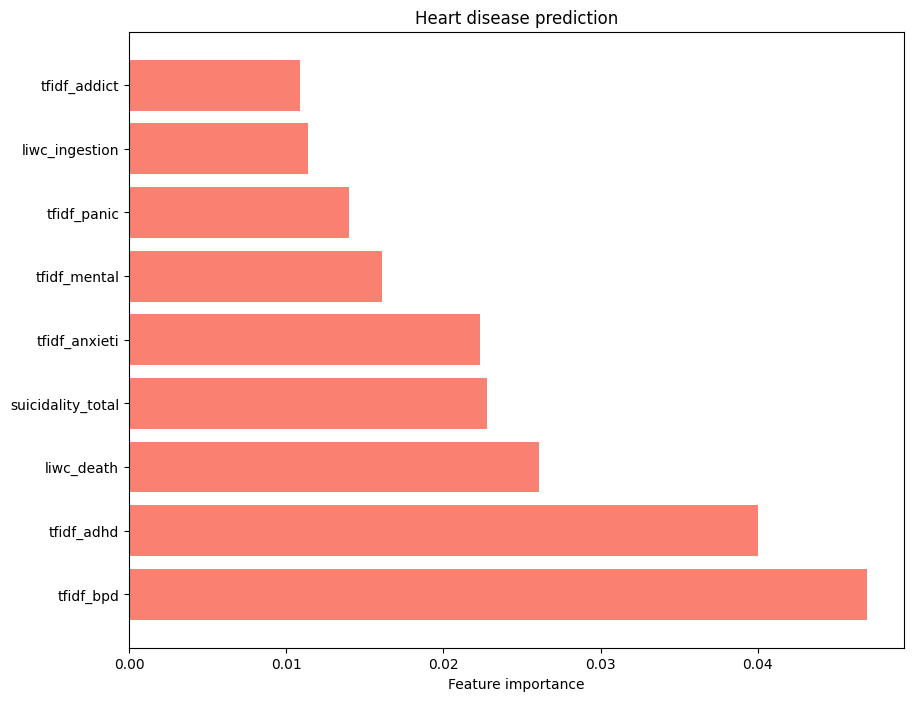

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
inds = np.argsort(model.feature_importances_)
inds = np.flip(inds)[:n_relevant_features]
ax.barh(np.arange(n_relevant_features), model.feature_importances_[inds], color='salmon')
ax.set_yticks(np.arange(n_relevant_features))
_ = ax.set_yticklabels(X_train.columns[inds])
_ = ax.set_xlabel('Feature importance')
_ = ax.set_title('Heart disease prediction')